# IBM Peer-Gradded assigment 
### List for ToDo
1) Brief description of the data set and a summary of its attributes

2) Initial plan for data exploration

3) Actions taken for data cleaning and feature engineering

4) Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

5) Formulating at least 3 hypothesis about this data

6) Conducting a formal significance test for one of the hypotheses and discuss the results 

7) Suggestions for next steps in analyzing this data

8) A paragraph that summarizes the quality of this data set and a request for additional data if needed
_____________________________________________________________________________________________________

## Data Set Choosen - Titanic Prediction Set
### Source - https://www.kaggle.com/c/titanic/data
_________________________________________________________________________________________________

# 1) Description

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.This Datsets contains data about all the passengers abord Titanic and wethere they survived or not 

In [53]:
# Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## 2)Data Exploration 

In [54]:
file_path="Titanic.csv"
data = pd.read_csv(file_path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:title={'center':'Missing % of values in columns'}>

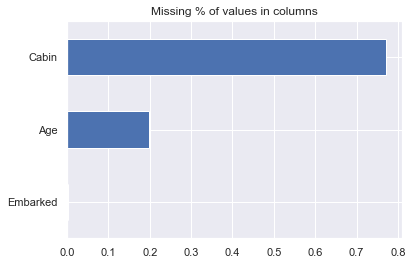

In [56]:
# finding out the number of null percentage in each columns
m=data.isnull().sum().sort_values()/len(data)
plt.title("Missing % of values in columns")
m[m!=0].plot(kind='barh')

Text(0.5, 1.0, '% of unique values in each col')

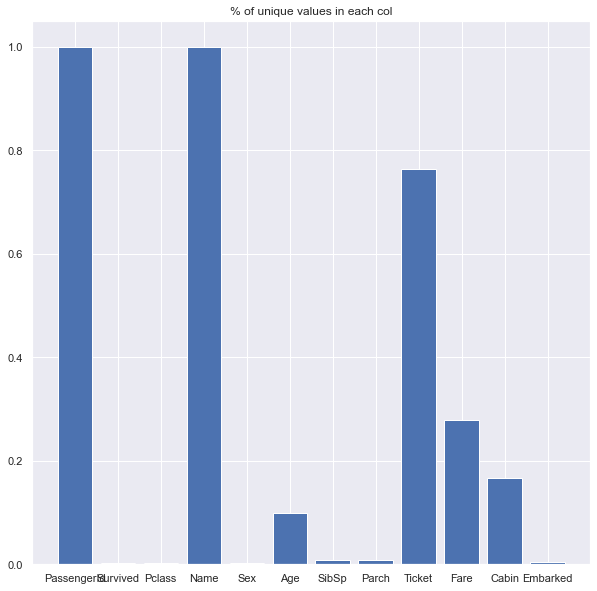

In [59]:
# Visualizing % of unique values in each col
no_of_uni_values_columns=[]
for col in data.columns:
    no_of_uni_values_columns.append(len(data[col].unique())/len(data))
plt.figure(figsize=(10,10))
plt.bar(data.columns,no_of_uni_values_columns)
plt.title("% of unique values in each col")


<Figure size 720x720 with 0 Axes>

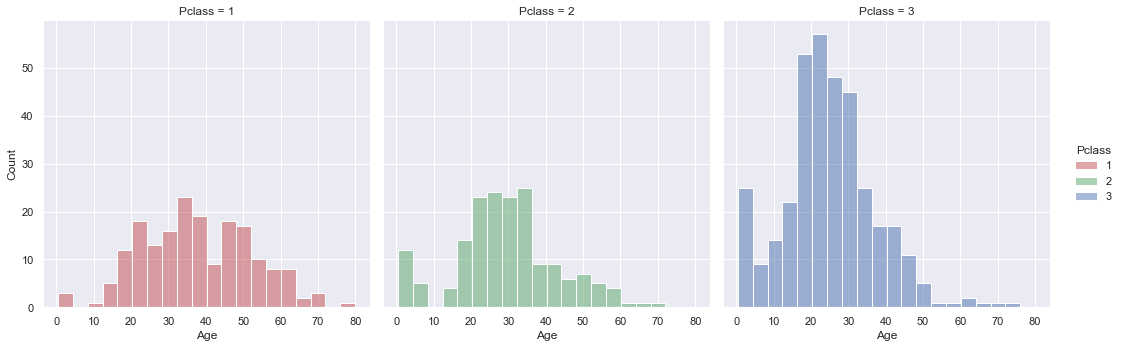

In [ ]:
# Exploring on Pclass and age 
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))
sns.displot(data=data,x=data.Age,hue=data.Pclass,palette=['r','g','b'],col='Pclass')


<AxesSubplot:xlabel='Age', ylabel='Fare'>

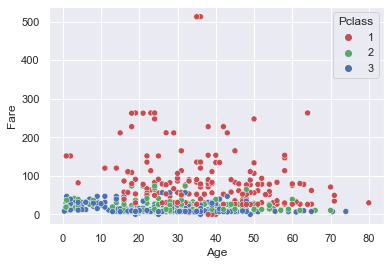

In [ ]:
sns.scatterplot(data=data,x='Age',y='Fare',hue='Pclass',palette=['r','g','b'])

## 3) Data Cleaning and Feature Engineering  

In [ ]:
# Drop unique columns
data= data.drop(['Name','PassengerId'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [ ]:
# Drop columns with more than 50 % null values
data= data.drop('Cabin',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
# Fill missing Data
data.groupby(["Pclass"])[["Age"]].median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [ ]:
## Filling age of people with median values according to their class
data["Age"] = data.groupby(["Pclass"])["Age"].apply(lambda x:x.fillna(x.median()))

In [ ]:
data['Embarked']=data['Embarked'].fillna('S')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
data=data.drop(['Ticket'],axis=1)

In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

data[one_hot_encode_cols].head().T

C:\Users\HRITHI~1\AppData\Local\Temp/ipykernel_31944/4291924716.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals


,0,1,2,3,4
Sex,male,female,female,female,male
Embarked,S,C,S,S,S


In [ ]:
# Ordinal Encoding 
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data[["Sex","Embarked"]] = enc.fit_transform(data[["Sex","Embarked"]])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


## 4) Exploratory Data Analysis


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

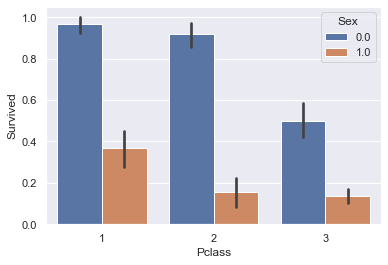

In [ ]:
sns.barplot(data=data,x='Pclass',y='Survived',hue='Sex')

It can be seen ,Female generally have a high percentage survival rate then men and also Pclass plays an infuence on survival Rate 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

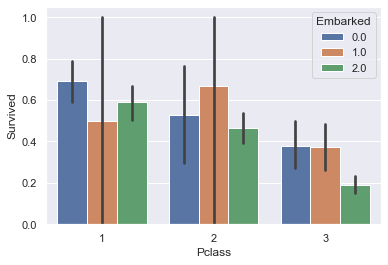

In [ ]:
sns.barplot(data=data,x='Pclass',y='Survived',hue='Embarked')

Place Embarked doenst play much influence however it can seen people embarked from cherbourg in third class have a very low rate of survival , this maybe beacuse they might be in the first decks which flooded or someother reason 

-> further Data needed for further investigation 

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

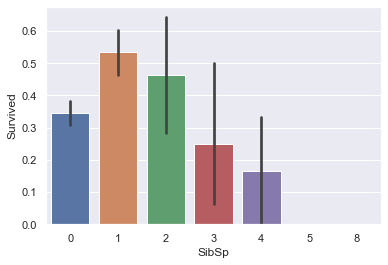

In [ ]:
sns.barplot(data=data,x='SibSp',y='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

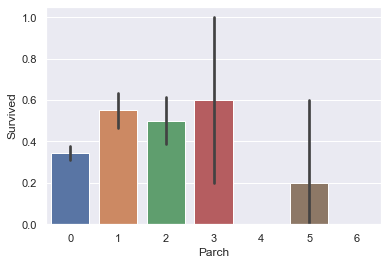

In [ ]:
sns.barplot(data=data,x='Parch',y='Survived')

We dont see any noticable  influence from Sibling Spouse and Parent children on Survival Rate

However one thing observed is more number of siblings spouse or parent children leads to less survival rate but this might also be due to a small proportion of people wit many parent children or spouse siblings 

## 5) Hypothesis Testing 

##### Null Hypothesis :
A person who didnt survive is from 3rd class and a men 

##### Alternate Hypothesis 1 :
A person who didnt survive is from any class and a men 

##### Alternate Hypothesis 2:
A person who didnt survive is from 3rd class and any gender 


## 6) Testing Null Hypothesis

In [ ]:
## Total number of non survivors
not_survived=data[data['Survived']==1]
len(not_survived)

342

In [61]:
## Number of men in 3rd in Non survivors
not_survived_men=not_survived[not_survived.Sex==0]
print("No of men who didnt survive : ",len(not_survived_men))
not_survived_men_c3=not_survived_men[not_survived_men.Pclass==3]
print("No of men in 3rd class who didnt survive : ",len(not_survived_men_c3))
print("% of men in 3rd class who  survived : ",len(not_survived_men_c3)/891)

No of men who didnt survive :  233
No of men in 3rd class who didnt survive :  72
% of men in 3rd class who  survived :  0.08080808080808081


From Null Hypothesis we can see that men from third class survivng rate is 8 %

## 7) Further analysis Recommended 

Many of age data was missing and thus I took the median age data grouped by Passenger Class 

The cabin column was deleted due to lack of 80% data, however cabin is an important information as the people in lower cabins which flooded first had low rate of survival. This column should be analyzed

Fare prices can be more analyzed on Pclass and Sex




## 8) Qaulity of Dataset

The Qaulity of this dataset is medicore as most of the cabin column was null which is an important information. Also age column had a lot of missing values which led to assuming median values which makes the dataset biased towards the middle aged people. Even after such backlashes the data set still provides enough data for us to conclude that Sex and Passenger Class have high influence on survival rate.
It can also be noticed that there isnt much difference in Ticket Fare values  i  second and third class.

further Data on Cabin information , Life boat ratios ,age information canhelp us conclude better hypothesis and more accurate machine learning Models 
